<a href="https://colab.research.google.com/github/yoohw0317/DAPproject/blob/main/DAP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
from wordcloud import WordCloud 

In [2]:
df = pd.read_excel("https://github.com/yoohw0317/DAPproject/blob/main/data.xlsx?raw=true")
df = df[['score', 'review']]
df.dropna
df

,score,review
0,5,11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다....
1,2,숙박 바우처가 생겨서 11월 24일 투숙을 했습니다.일이 생겨서 저녁 7시쯤 늦게 ...
2,5,모든것이 좋았습니다.다만 욕조 물빠지는 소리가 좀 거슬리긴 했어요그거 외에는 인생에...
3,5,"엄마랑 처음 호캉스 간거엿는데 호텔 입구부터 직원분들의 친절함, 그리고 객실 상태 ..."
4,5,결혼 후에 특별한 숙박을 위해 방문했습니다. 최고의 서비스와 시설들로 매우 만족스러...
...,...,...
428,5,"우리는 2박을 묵었는데 서명인 서울. 대부분의 택시 기사가 호텔을 모르는 서명인, ..."
429,5,"우리는 두 개의 절대적으로 환상적인, 잊을 수 없는 일을 서명인. 도착했을 때, 우..."
430,5,다음에도 꼭 이곳에 다시 올 걸지 사용자_이름:. 방에 도착했을 때 제공된 웰컴 드...
431,5,76 층 로비. 시작할 수 있습니다. 룸 92 차 바닥. 환상적인 전망이 다. 매우...


In [3]:
def regularExpression (text):
  exp = re.compile('[^ 가-힣]')
  return exp.sub('', text);

해당 test에 한글을 제외한 모든 것들이 걸러지는지 시험하기 위해 한국어를 제외한 대부분의 모든 것들을 넣어줍니다.

1. 숫자

2. ㅠㅠ ㅋㅋ와 같은 이모티콘

3. .,!와 같은 기호

4. 하트, 별과 같은 이모티콘

In [4]:
test='12월 15일에 테스트 해봅니당...ㅠㅠㅠㅠ 제발 성공하기를 흑ㅠㅠㅠㅠㅠㅠㅠㅠㅎㅎㅎㅎㅎㅎ, plz plz success...!!!!! 다 지워져라 얍★'
regularExpression(test)

'월 일에 테스트 해봅니당 제발 성공하기를 흑    다 지워져라 얍'

해당 환경설정은 사용자에 맞는 환경설정을 사용해야합니다.

그렇지 않으면 상상치도 못한 오류에 직면하게 될 수도 있습니다.

코드 작성자의 환경은 다음과 같습니다.

Python 3.8.8

java 17.0.1 2021-10-19 LTS

Java(TM) SE Runtime Environment (build 17.0.1+12-LTS-39)

Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)

JPype1-1.3.0-cp38-cp38-win_amd64.whl



In [5]:
!apt-get update 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,452 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [691 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,461 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Ign:13 https://developer.download.nvidia.

In [6]:
from konlpy.tag import Okt
from collections import Counter

만약 에러가 발생한다면 해당 코드에 들어가서 에러가 나는 부분을 지워주면 정상 실행될 때도 있습니다.


이게 무슨소린가 싶겠지만 직접 해본사람은 이해할 수 있습니다.

In [7]:
test = regularExpression(df['review'][0])
test
okt = Okt()
testnouns = okt.nouns(test)
testnouns #정상 추출 확인!

['일', '숙박', '그', '시간', '일', '분', '조만간', '다시', '예약', '가족', '또', '해']

말뭉치를 생성

말뭉치: 자연어처리에서 자연어의 집합

In [11]:
totalCorpus = "".join(df['review'].tolist())
totalCorpus[:40]

'11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 '

In [12]:
totalCorpus = regularExpression(totalCorpus)
totalCorpus[:40]

'일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다조만간'

In [13]:
nouns = okt.nouns(totalCorpus)
print(nouns[:20])

['일', '숙박', '그', '시간', '일', '분', '조만간', '다시', '예약', '가족', '또', '해', '숙박', '바', '처가', '월', '일', '투숙', '일이', '저녁']


In [14]:
totalcount_notFiltered = Counter(nouns)
print(totalcount_notFiltered.most_common(20))

[('호텔', 355), ('직원', 291), ('서비스', 285), ('니엘', 201), ('객실', 178), ('것', 177), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('층', 129), ('시설', 127), ('라운지', 126), ('체크', 124), ('수', 124), ('시간', 95), ('룸', 95), ('서울', 95), ('때', 85)]


https://www.ranks.nl/stopwords/korean

불용어 사전 링크를 참고해서 엑셀로 정리하여 사용

In [15]:
stopWords = pd.read_excel('https://github.com/yoohw0317/DAPproject/blob/main/stopwords.xlsx?raw=true').values.tolist()

In [16]:
filteredNouns = [x for x in nouns if [x] not in stopWords]
totalCount = Counter(filteredNouns)
print(totalCount.most_common(20))

[('직원', 291), ('서비스', 285), ('객실', 178), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('층', 129), ('시설', 127), ('라운지', 126), ('체크', 124), ('수', 124), ('룸', 95), ('조식', 84), ('투숙', 77), ('전망', 69), ('다시', 67), ('생각', 64), ('곳', 63)]


**뷰, 룸, 방 **을 제외하고는 한 글자가 의미가 없어보임. filter 다시 해봅시다 

이번에는 뷰, 룸, 방을 제외한 한 글자는 모두 사라지도록


In [17]:
filteredNouns = [x for x in filteredNouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
totalCount = Counter(filteredNouns)
print(filteredNouns[:20])
print(totalCount.most_common(20))

['숙박', '조만간', '다시', '예약', '가족', '숙박', '처가', '투숙', '일이', '저녁', '체크', '체크', '추가', '한강', '뷰', '변경', '프리미어', '더블', '룸', '업그레이드']
[('직원', 291), ('서비스', 285), ('객실', 178), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('시설', 127), ('라운지', 126), ('체크', 124), ('룸', 95), ('조식', 84), ('투숙', 77), ('전망', 69), ('다시', 67), ('생각', 64), ('매우', 58), ('기분', 56), ('수영장', 55)]


그래프에 사용할 폰트를 업로드합니다.

폰트는 한글이 지원되는 폰트면 무엇이든 가능합니다.

대신 폰트의 이름은 'this'로 고정해주세요 (확장자가 포함된다면 this.ttf)


In [ ]:
from google.colab import files
files.upload()

여기까지 사실 필요한 데이터는 대부분 뽑은거죠.


이제 데이터를 이용해서 호텔의 리뷰를 분석해봅시다.


우선적으로 아래에 있는 코드 2줄은 한글 폰트를 적용하는 변수 이름입니다.



In [132]:
font_label=fm.FontProperties(fname='/content/this.ttf', size=20)
font_title=fm.FontProperties(fname='/content/this.ttf', size=30)
font_xticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_yticks=fm.FontProperties(fname='/content/this.ttf', size=20)

1. 전체적인 내용에서 주요 단어 빈도수 분석

파싱된 명사의 개수는 중복을 포함해서 10317개로 단어에 대한 비율이 너무 작게 나타날 우려가 존재합니다.

그래서 상위 50위의 단어들을 파악해봅시다.


In [112]:
sum(totalCount.values())

10317

In [117]:
top50 = totalCount.most_common(50)
x = [x for (x, y) in top50]
y = [y for (x, y) in top50]
colors_top50 = sns.color_palette('Spectral', 50)

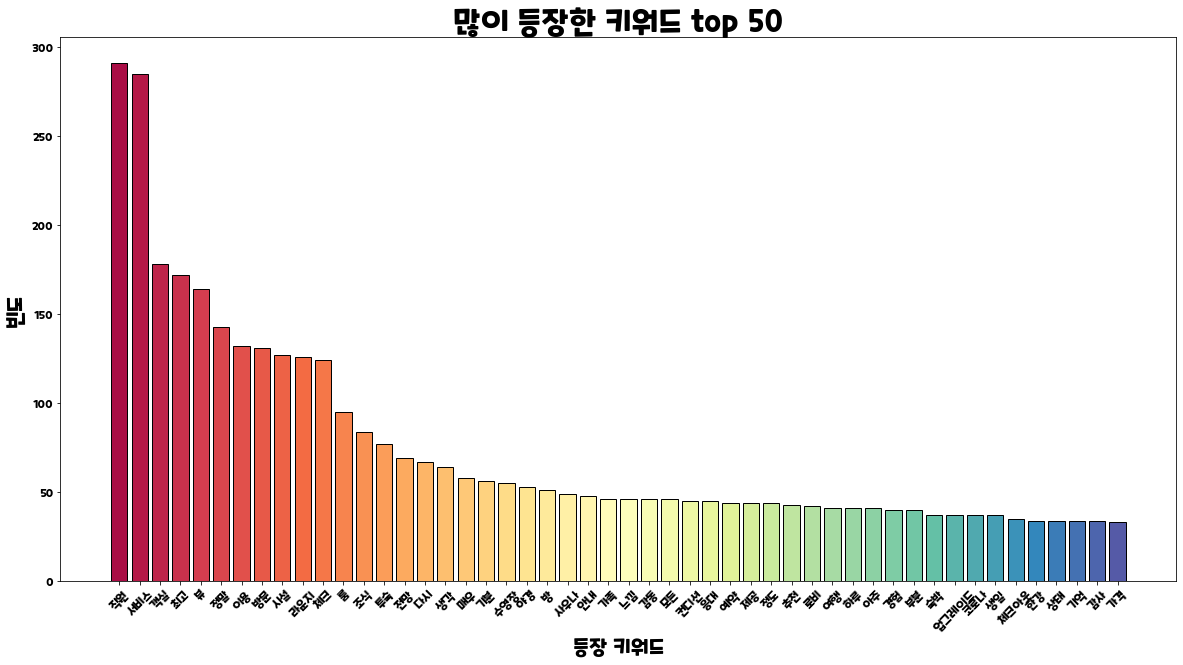

In [134]:
plt.figure(figsize = (20, 10))
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

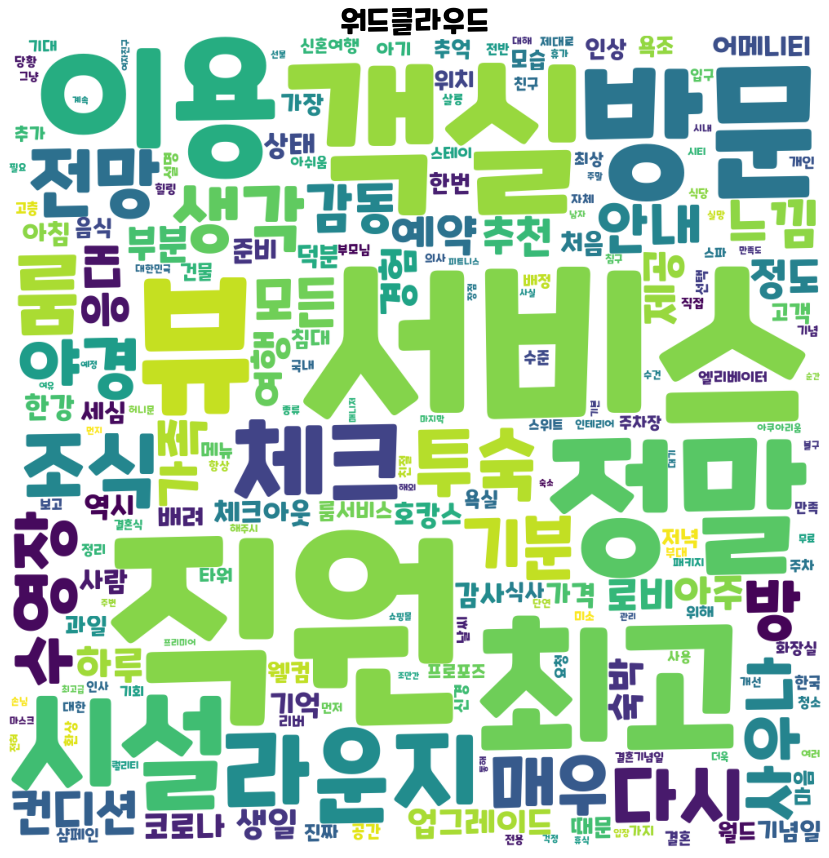

In [136]:
wordCloud = WordCloud(max_font_size=250, font_path='/content/this.ttf', background_color='white', width=1000, height=1000).generate_from_frequencies(totalCount)
plt.figure(figsize=(15, 15))
plt.imshow(wordCloud)
plt.title("워드클라우드", fontproperties=font_title)
plt.axis('off')
plt.show()

In [95]:
rating = Counter(df['score'])
rating = sorted(rating.items())

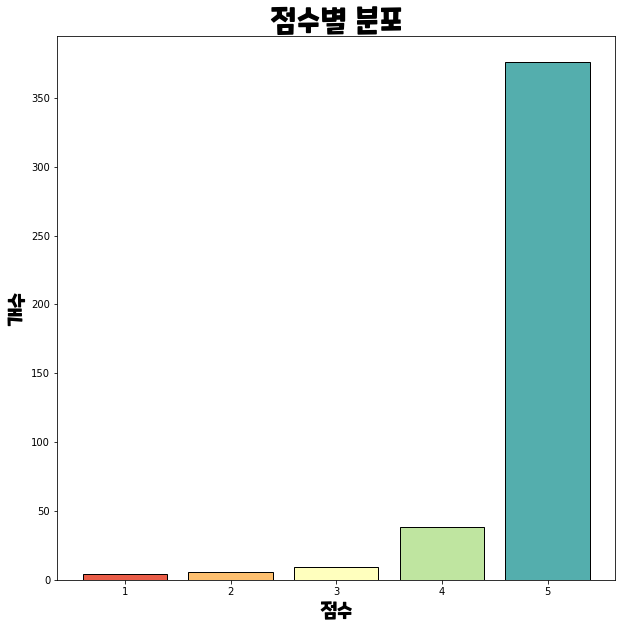

In [92]:
colors_rating = sns.color_palette('Spectral', 5)
plt.figure(figsize = (10, 10))

plt.bar([x for (x, y) in rating], [y for (x, y) in rating], color=colors_rating, edgecolor='black')
plt.xlabel("점수",fontproperties=font_label)
plt.ylabel("개수",fontproperties=font_label)
plt.title("점수별 분포",fontproperties=font_title)
plt.show()